In [1]:
import pandas as pd
import numpy as np

# Simple Data Analysis

In [2]:
## Read Dataset
df = pd.read_csv('advertising.csv')

In [3]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [6]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


/Users/andang/miniconda3/envs/project11/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


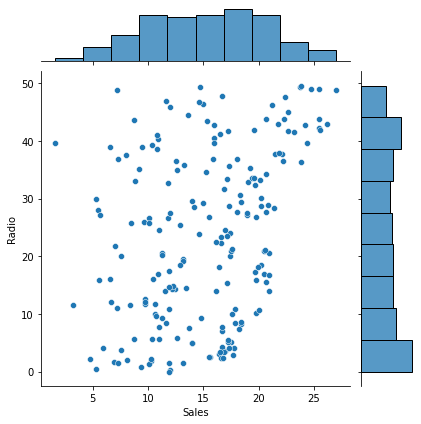

In [10]:
import seaborn as sns
sns.jointplot(df['Sales'],df['Radio' ],)

In [ ]:
def predict_sales(radio, weight, bias):
    return weight*radio + bias

# Cost Function


![alt text](cost_function.png "Title")


In [11]:
def cost_function(radio, sales, weight, bias):
    companies = len(radio)
    total_error = 0.0
    for i in range(companies):
        total_error += (sales[i] - (weight*radio[i] + bias))**2
    return total_error / companies

In [12]:
# Gradient Descent to update weight
def update_weights(radio, sales, weight, bias, learning_rate):
    weight_deriv = 0
    bias_deriv = 0
    companies = len(radio)

    for i in range(companies):
        # Calculate partial derivatives
        # -2x(y - (mx + b))
        weight_deriv += -2*radio[i] * (sales[i] - (weight*radio[i] + bias))

        # -2(y - (mx + b))
        bias_deriv += -2*(sales[i] - (weight*radio[i] + bias))

    # We subtract because the derivatives point in direction of steepest ascent
    weight -= (weight_deriv / companies) * learning_rate
    bias -= (bias_deriv / companies) * learning_rate

    return weight, bias

In [18]:
def train(radio, sales, weight, bias, learning_rate, iters):
    cost_history = []

    for i in range(iters):
        weight,bias = update_weights(radio, sales, weight, bias, learning_rate)

        #Calculate cost for auditing purposes
        cost = cost_function(radio, sales, weight, bias)
        cost_history.append(cost)

        # Log Progress
        if i % 10 == 0:
            print("iter={:d}    weight={:.2f}    bias={:.4f}    cost={:.2}".format(i, weight, bias, cost))

#     return weight, bias, cost_history

In [21]:
train(df['Radio'][:10], df['Sales'][:10], weight=.03, bias=.0014, learning_rate=0.01, iters= 100)

iter=0    weight=6.82    bias=0.2475    cost=4.5e+04
iter=10    weight=86746251201251.58    bias=2265743908024.4170    cost=8.1e+30
iter=20    weight=1161935450476512759464853504.00    bias=30348840808418979124084736.0000    cost=1.5e+57
iter=30    weight=15563715692357013921762643873520097951744.00    bias=406512022454541011914688473918664081408.0000    cost=2.6e+83
iter=40    weight=208470484357096463230952727558549943821167983736127488.00    bias=5445085215717333953830048821301932530079802066993152.0000    cost=4.7e+109
iter=50    weight=2792388636951559767242197328548378597044488167335571562521178406912.00    bias=72934996675870831557488728331596453699984439287730425481547218944.0000    cost=8.4e+135
iter=60    weight=37403061271828250580713429390074555150126198705774972523458875820773414023462912.00    bias=976938565581016827039470241158427064489978974009999121791447259309943935729664.0000    cost=1.5e+162
iter=70    weight=501000818436007490058136734298256385304608422904102131804